# Montu Python 
## Astronomical ephemerides for the Ancient World
## Example: Compute *Montunctions*


## Goals of this notebook

The goal of this notebook is to determine the stable positions of mars across ancient Egypt history and check when this *marsticies* happened close to the winter solstice and in the Taurus constellation.

## Loading tools

We need to load the packages and the required data for it (star database, planet position database, etc.):

In [30]:
# Montu packages and data
from montu import *
Montu.load_kernels(verbose=False)
allstars=Stars()

# External packages
import plotly.express as px
from pyplanets.planets.mars import Mars

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## *Marstices*

Lets set observing conditions and initial time of exploration:

In [32]:
earth = PlanetaryBody('Earth')
tebas = ObservingSite(planet=earth,lon=33,lat=24,height=0)

Our target body:

In [33]:
mars = PlanetaryBody('Mars')

Now let's predict all the Marstices in the century from -1400 to -1500:

In [34]:
from pyplanets.planets.mars import Mars
marstices = pd.DataFrame()
i = 0

# Range of years
initial_year = -2000
final_year = -70

mars.reset_store()
mtime = MonTime(f'{initial_year}-01-01 00:00:00.00',scale='utc',calendar='proleptic')
while True:
    epoch1 = Mars(mtime.obj_pyplanet).station_longitude_1()
    epoch2 = Mars(mtime.obj_pyplanet).station_longitude_2()
    """
    epoch1 = Extra.station_longitude_1(mtime.year)
    epoch2 = Extra.station_longitude_2(mtime.year)
    """
    mtime1 = MonTime(float(epoch1),format='jd',calendar='mixed')
    mtime2 = MonTime(float(epoch2),format='jd',calendar='mixed')

    # Stopping condition
    if mtime2.obj_datetime < datetime(-final_year,1,1):
        break

    # Data marstice
    marstice = pd.DataFrame(dict(
        datepro = [mtime1.datestr,mtime2.datestr],
        datemix = [mtime1.datemixed,mtime2.datemixed],
        datejul = [mtime1.obj_datejulianmix,mtime2.obj_datejulianmix],
        type = ['first','second'],
        jed = [mtime1.jed,mtime2.jed],
    ))

    # Append marstice to table
    marstices = pd.concat([marstices,marstice])

    # Advance 2 years for next marstice
    mtime = mtime + 2*YEAR
    i += 1

marstices.drop_duplicates(inplace=True)
marstices.reset_index(drop=True,inplace=True)
marstices

,datepro,datemix,datejul,type,jed
0,-2001-09-21 12:52:37.175000,-2001-10-08 12:52:37,2711-10-08 12:52:37,first,9.90473036541377893e+05
1,-2001-12-09 02:02:01.392000,-2001-12-26 02:02:01,2711-12-26 02:02:01,second,9.90551584738333593e+05
2,-1999-10-25 10:48:04.202000,-1999-11-11 10:48:04,2713-11-11 10:48:04,first,9.91237950048634782e+05
3,-1998-01-14 00:58:12.633500,-1998-01-31 00:58:13,2714-01-31 00:58:13,second,9.91318540423999657e+05
4,-1997-11-30 04:28:27.749100,-1997-12-17 04:28:28,2715-12-17 04:28:28,first,9.92003686432281509e+05
...,...,...,...,...,...
1805,-74-01-21 08:09:18.375700,-0074-01-23 08:09:18,4638-01-23 08:09:18,second,1.69405183979601506e+06
1806,-73-12-07 15:27:39.900600,-0073-12-09 15:27:40,4639-12-09 15:27:40,first,1.69473714421181264e+06
1807,-72-02-26 13:32:48.605000,-0072-02-28 13:32:49,4640-02-28 13:32:49,second,1.69481806445144652e+06
1808,-70-01-12 01:12:29.1600,-0070-01-14 01:12:29,4642-01-14 01:12:29,first,1.69550355033566686e+06


Now we want to add to this information other relevant astronomical information:

1. Position of mars in the sky
2. Date of occurrence of winter solstices
3. Angular distance of Mars to Aldebaran

Position of Mars in the sky:

In [35]:
mars.reset_store()
for index in tqdm.tqdm(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

100%|██████████| 1810/1810 [00:05<00:00, 360.23it/s]


Positions are stored in a separate dataframe:

In [39]:
mars_marstices = copy.deepcopy(mars.df)
mars_marstices

,datetime64,tt,jtd,jed,RAJ2000,DecJ2000,RAEpoch,DecEpoch,LonJ2000,LatJ2000,...,LatEpoch_SPICE,tsa_SPICE,HA_SPICE,az_SPICE,el_SPICE,site_distance_SPICE,sun_distance_SPICE,elongation_SPICE,phase_SPICE,mag_SPICE
0,2713-09-21 12:52:37.175000,-1.26236570942693756e+11,9.90473577052155626e+05,9.90473036541377893e+05,7.02612215805537144,23.31899038805205748,3.07424829437436609,17.83482152755087213,104.10813827484894034,0.63037728313572083,...,0.09957254186578871,15.03339815886666742,11.95914986449230177,359.12551577063157993,-48.16090658660912993,0.75219350665205154,1.57662642278237830,129.82015895227027613,28.68402346482960041,-0.90000000000000002
1,2713-12-09 02:02:01.392000,-1.26229784378476776e+11,9.90552125249111326e+05,9.90551584738333593e+05,5.63211605823013528,26.21525274908603720,1.77488085538407891,13.75486627208271528,85.04460779688137961,2.87083489804655567,...,2.33999445530319417,9.35149927472951958,7.57661841934544089,292.89157682684452766,-15.02487993126936416,0.81806388225158178,1.64387850276435854,131.01914846122258496,26.92770546847332724,-0.59999999999999998
2,2715-10-25 10:48:04.202000,-1.26170482464562759e+11,9.91238489993486670e+05,9.91237950048634782e+05,9.47917079847223931,17.70942043541341704,5.51766626208126976,26.05521826633386340,138.88651619132483006,2.68107491100162099,...,2.29622157581641062,15.21988982957216407,9.70222356749089343,324.10682116842571077,-29.86640713195883734,0.82949606898992079,1.64360960808745737,130.10056636535344410,27.19130415274762669,-0.59999999999999998
3,2716-01-14 00:58:12.633500,-1.26163519480569641e+11,9.91319080085999682e+05,9.91318540423999657e+05,8.16550875171110846,24.24933086392621107,4.07879549453416690,24.88879504254419217,119.39931944561732280,4.06436791873982539,...,3.57619539556010801,10.68452464336493790,6.60572914883077100,296.30173415920182833,2.31042590663841407,0.84066951072051921,1.65810709135480328,128.77121743700755019,27.94483160543264333,-0.59999999999999998
4,2717-11-30 04:28:27.749100,-1.26104322889886078e+11,9.92004225811503711e+05,9.92003686432281509e+05,11.64234802407816538,6.38976470990626844,8.00697444864612784,24.69932048195751761,172.54235700063640024,3.73536271353728200,...,3.62338097947215099,11.20962212262612567,3.20264767397999783,281.27279435159067589,46.45943387077486619,0.82696005072322243,1.65859632573831983,132.32175266132458091,26.04614309622758483,-0.59999999999999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,4640-01-21 08:09:18.375700,-6.54473976869541550e+10,1.69405197121580830e+06,1.69405183979601506e+06,6.81629320217598700,26.63746655362011495,4.67199622035875350,25.85560328562066346,100.95044664574075455,3.66243272397401265,...,3.39295351360730546,18.32136357984072461,13.64936735948197111,27.26330549706755946,-34.69850185440392210,0.82811540880781331,1.65411579758423333,130.82867936378241325,26.91085320795368929,-0.59999999999999998
1806,4641-12-07 15:27:39.900600,-6.53881874059941101e+10,1.69473727539358661e+06,1.69473714421181264e+06,10.49431058999392441,13.14925590398282473,8.58202864292104017,22.33409987326121637,154.25290062059696083,3.43706997549178839,...,3.31853001093037525,22.65849361818843732,14.07646497526739715,35.56459551628701377,-34.65526857037048813,0.84183018545582555,1.65346271369043341,129.82186411451999675,27.15934124021671181,-0.59999999999999998
1807,4642-02-26 13:32:48.605000,-6.53811958990763855e+10,1.69481819561254187e+06,1.69481806445144652e+06,9.22870779903944438,20.07692545940691176,7.18834426688883443,26.36103496676017599,134.77097757296513691,3.84500220334711384,...,3.65075337960679391,2.06151764898730860,18.87317338209847506,69.68681452915295438,21.47489635327971769,0.83419211499466794,1.65677732850342530,129.03027500850927822,27.94503703890709545,-0.59999999999999998
1808,4644-01-12 01:12:29.160000,-6.53219699392078552e+10,1.69550368125916831e+06,1.69550355033566686e+06,12.59120747251351347,0.17166632605852214,10.82225657298339705,11.60794886339449050

Compute the date of the previous and next winter solstice, and the days elapsed to the closest one:

In [40]:
# Loop on marstices
for index in tqdm.tqdm(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Calculate next and previous solstices
    prev_equinoxes_solstices = MonTime.previous_equinoxes_solstices(mtime)
    next_equinoxes_solstices = MonTime.next_equinoxes_solstices(mtime)

    # Get the closest solstice
    closest_solstice = min(abs(mtime.jed - prev_equinoxes_solstices[3]),
                           abs(mtime.jed - next_equinoxes_solstices[3]))

    # Add winter solstice to DataFrame
    marstices.loc[index,'closest_solstice'] = closest_solstice

marstices
    

100%|██████████| 1810/1810 [00:03<00:00, 465.65it/s]


,datepro,datemix,datejul,type,jed,closest_solstice
0,-2001-09-21 12:52:37.175000,-2001-10-08 12:52:37,2711-10-08 12:52:37,first,9.90473036541377893e+05,89.85828065429814160
1,-2001-12-09 02:02:01.392000,-2001-12-26 02:02:01,2711-12-26 02:02:01,second,9.90551584738333593e+05,11.31008369836490601
2,-1999-10-25 10:48:04.202000,-1999-11-11 10:48:04,2713-11-11 10:48:04,first,9.91237950048634782e+05,55.43582726689055562
3,-1998-01-14 00:58:12.633500,-1998-01-31 00:58:13,2714-01-31 00:58:13,second,9.91318540423999657e+05,25.15454809751827270
4,-1997-11-30 04:28:27.749100,-1997-12-17 04:28:28,2715-12-17 04:28:28,first,9.92003686432281509e+05,20.18620806466788054
...,...,...,...,...,...,...
1805,-74-01-21 08:09:18.375700,-0074-01-23 08:09:18,4638-01-23 08:09:18,second,1.69405183979601506e+06,30.78897109138779342
1806,-73-12-07 15:27:39.900600,-0073-12-09 15:27:40,4639-12-09 15:27:40,first,1.69473714421181264e+06,14.38869430054910481
1807,-72-02-26 13:32:48.605000,-0072-02-28 13:32:49,4640-02-28 13:32:49,second,1.69481806445144652e+06,66.53154533333145082
1808,-70-01-12 01:12:29.1600,-0070-01-14 01:12:29,4642-01-14 01:12:29,first,1.69550355033566686e+06,21.53240561834536493


Now we want to compute the angular distance to Aldebaran. For this purpose, we need to get the information about the star from the database:

In [41]:
aldebaran = allstars.get_stars(ProperName='Aldebaran')
aldebaran.data

,StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex
15107,15108,21421,29139.0,1457.0,Gl 171.1A,87Alp Tau,Aldebaran,4.59866679000000023,16.50976164000000068,19.96406468356959962,0.87,-0.63124484155242799,K5III,1.53800000000000003


Now we will compute for each marstice, the angular distance to Aldebaran:

In [42]:
# Loop on marstices
for index in tqdm.tqdm(marstices.index):

    # Get marstice information and location of mars
    marstice = marstices.loc[index]
    mars_location = mars_marstices.loc[index]

    # un commente to check
    """
    print(marstice.jed,marstice.datemix)
    print(D2H(mars_location.DecJ2000),D2H(mars_location.RAJ2000))
    print(D2H(float(aldebaran.data.Dec)),D2H(float(aldebaran.data.RA)))
    print(angdist)
    break
    """

    # Compute angular distance
    aldebaran_angdist = Montu.haversine_distance(mars_location.DecJ2000*DEG,15*mars_location.RAJ2000*DEG,
                                       float(aldebaran.data.Dec)*DEG,15*float(aldebaran.data.RA)*DEG)*RAD
    
    # Angular distance
    marstices.loc[index,'aldebaran_angdist'] = aldebaran_angdist

marstices

100%|██████████| 1810/1810 [00:00<00:00, 4107.64it/s]


,datepro,datemix,datejul,type,jed,closest_solstice,aldebaran_angdist
0,-2001-09-21 12:52:37.175000,-2001-10-08 12:52:37,2711-10-08 12:52:37,first,9.90473036541377893e+05,89.85828065429814160,34.80931348641134804
1,-2001-12-09 02:02:01.392000,-2001-12-26 02:02:01,2711-12-26 02:02:01,second,9.90551584738333593e+05,11.31008369836490601,17.36996276414768303
2,-1999-10-25 10:48:04.202000,-1999-11-11 10:48:04,2713-11-11 10:48:04,first,9.91237950048634782e+05,55.43582726689055562,69.49358999737009412
3,-1998-01-14 00:58:12.633500,-1998-01-31 00:58:13,2714-01-31 00:58:13,second,9.91318540423999657e+05,25.15454809751827270,50.45663711923921113
4,-1997-11-30 04:28:27.749100,-1997-12-17 04:28:28,2715-12-17 04:28:28,first,9.92003686432281509e+05,20.18620806466788054,103.03161065245204497
...,...,...,...,...,...,...,...
1805,-74-01-21 08:09:18.375700,-0074-01-23 08:09:18,4638-01-23 08:09:18,second,1.69405183979601506e+06,30.78897109138779342,32.43547357216547056
1806,-73-12-07 15:27:39.900600,-0073-12-09 15:27:40,4639-12-09 15:27:40,first,1.69473714421181264e+06,14.38869430054910481,84.82768062340318238
1807,-72-02-26 13:32:48.605000,-0072-02-28 13:32:49,4640-02-28 13:32:49,second,1.69481806445144652e+06,66.53154533333145082,65.56597421149290028
1808,-70-01-12 01:12:29.1600,-0070-01-14 01:12:29,4642-01-14 01:12:29,first,1.69550355033566686e+06,21.53240561834536493,118.48376231794699720


Now we will mark the marstices according to closest solstice and aldebaran angular distance:

In [43]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

Number of marstices close to solstices:  188
Number of marstices close to Aldebaran:  154
Number of Montunctions:  39


These are the dates:

In [44]:
montunctions = marstices.loc[marstices.montunctions]
montunctions

,datepro,datemix,datejul,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
119,-1875-12-05 17:02:31.201400,-1875-12-21 17:02:31,2837-12-21 17:02:31,second,1.03656921008334996e+06,14.31683956307824701,13.64307261487061496,True,True,True
311,-1670-12-06 11:15:36.625700,-1670-12-20 11:15:37,3042-12-20 11:15:37,second,1.11144396917390823e+06,14.38198851863853633,11.63520634204775561,True,True,True
385,-1591-12-08 17:38:14.82000,-1591-12-22 17:38:14,3121-12-22 17:38:14,second,1.14030123488520877e+06,11.33330100076273084,13.15529199367360924,True,True,True
459,-1512-12-10 23:40:17.252100,-1512-12-24 23:40:17,3200-12-24 23:40:17,second,1.16915848631078773e+06,8.28225414128974080,14.72220841596218754,True,True,True
503,-1465-12-06 03:30:47.843000,-1465-12-19 03:30:48,3247-12-19 03:30:48,second,1.18631864638707135e+06,14.54971300601027906,9.84821383976247056,True,True,True
577,-1386-12-09 10:46:27.758700,-1386-12-21 10:46:28,3326-12-21 10:46:28,second,1.21517594893239229e+06,11.44790763291530311,11.17757886505763310,True,True,True
651,-1307-12-11 17:38:51.260300,-1307-12-23 17:38:51,3405-12-23 17:38:51,second,1.24403323531551287e+06,8.36272502806968987,12.65208489791389646,True,True,True
695,-1260-12-05 17:34:40.411600,-1260-12-16 17:34:40,3452-12-16 17:34:40,second,1.26119323241217155e+06,14.79368784069083631,8.45488437076692811,True,True,True
725,-1228-12-15 00:09:03.507000,-1228-12-26 00:09:04,3484-12-26 00:09:04,second,1.27289050629059086e+06,5.29490109696052969,14.19803691540778345,True,True,True
769,-1181-12-09 01:49:11.398900,-1181-12-20 01:49:11,3531-12-20 01:49:11,second,1.29005057582637598e+06,11.65591349545866251,9.46376261163043075,True,True,True


Let's see one of this *montunctions* in the sky:

In [47]:
# Time of montunction
mtime_montunction = MonTime(montunctions.iloc[0].jed,format='jd')
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*DAY,0*DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

Create a map of montunction:

Text(1, 1, 'MontuPython 0.5.1')

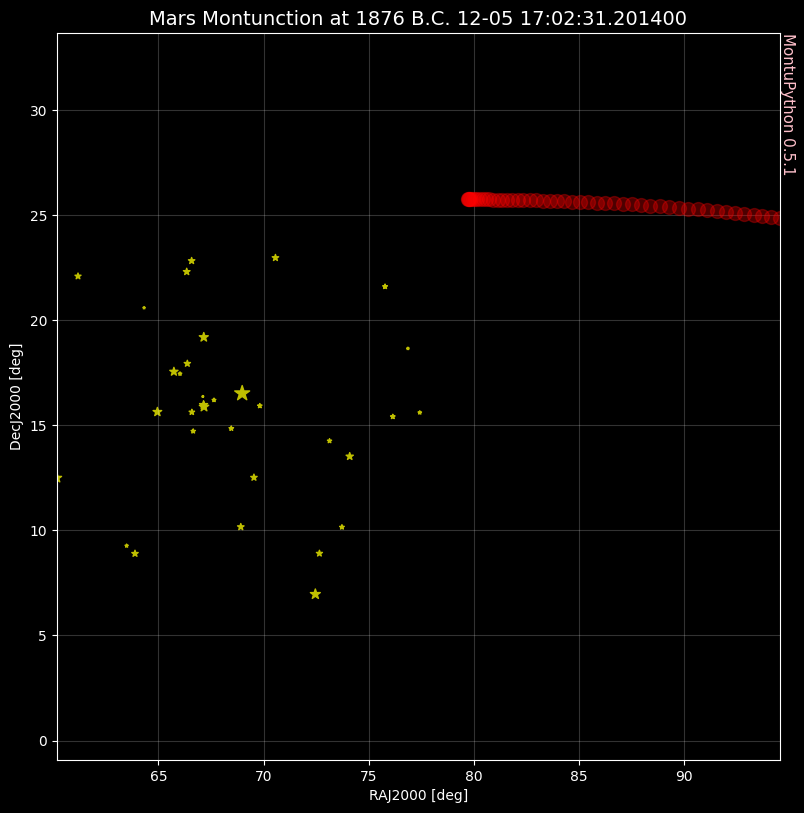

In [48]:
# Plot Hyades
hyades = allstars.get_stars_area(RA=aldebaran.data.RA,Dec=aldebaran.data.Dec,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

for index in mars.df.index:
    mars_position = mars.df.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Mars Montunction at {mtime_montunction.datespice}",fontsize=14)
Montu.montu_mark(ax)

## Interesting montunctions

We are interested in the Montunctions happening around the date of birth or dead of Senenmut who, according to several chronologies lived between 1480bce and 1458 bce. Let's select the montunctions in this range:

In [49]:
mtime_start = MonTime('bce1480-01-01 00:00:00.00')+(-50*YEAR)
mtime_end = MonTime('bce1480-01-01 00:00:00.00')+50*YEAR

cond = (montunctions.jed>=mtime_start.jed) & (montunctions.jed<=mtime_end.jed)
print("Number of montunctions in the desired interval: ",cond.sum())

montunctions_selected = montunctions.loc[cond]
montunctions_selected

Number of montunctions in the desired interval:  2


,datepro,datemix,datejul,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,montunctions
459,-1512-12-10 23:40:17.252100,-1512-12-24 23:40:17,3200-12-24 23:40:17,second,1.16915848631078773e+06,8.28225414128974080,14.72220841596218754,True,True,True
503,-1465-12-06 03:30:47.843000,-1465-12-19 03:30:48,3247-12-19 03:30:48,second,1.18631864638707135e+06,14.54971300601027906,9.84821383976247056,True,True,True


Let's see the montunctions:


Text(1, 1, 'MontuPython 0.5.1')

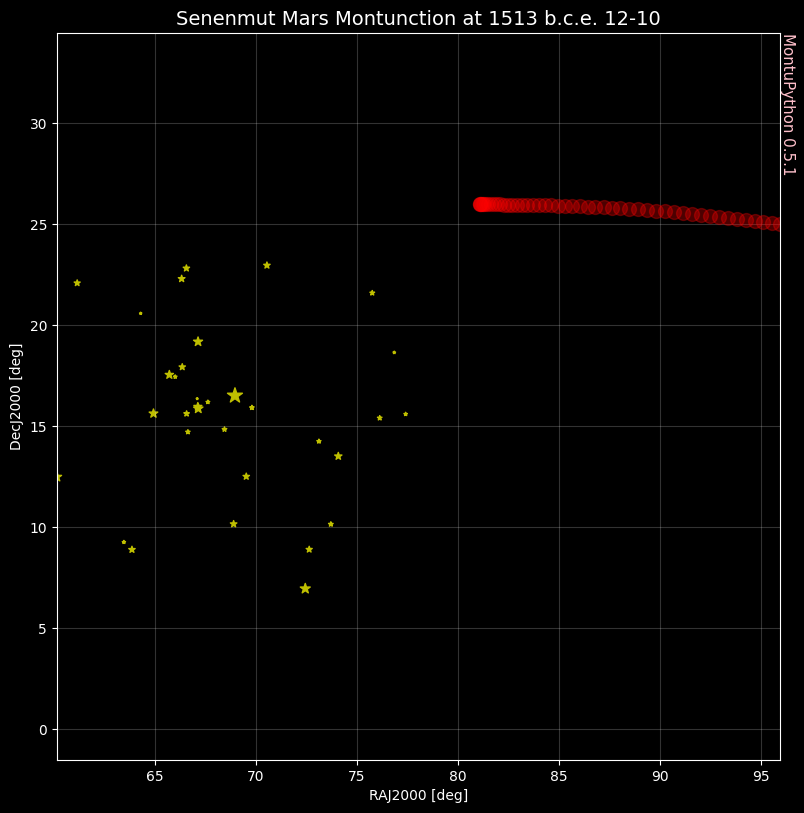

In [50]:
# Time of montunction
isel = 0
mtime_montunction = MonTime(montunctions_selected.iloc[isel].jed,format='jd')
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*DAY,0*DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.calculate_sky_position(mtime,tebas,method='SPICE',store=1,verbose=0)

# Plot Hyades
hyades = allstars.get_stars_area(RA=aldebaran.data.RA,Dec=aldebaran.data.Dec,radius=10,Mag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=False,figargs=dict(figsize=(8,8)))

for index in mars.df.index:
    mars_position = mars.df.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Senenmut Mars Montunction at {-mtime_montunction.year+1} b.c.e. {mtime_montunction.month:02d}-{mtime_montunction.day:02d}",fontsize=14)
Montu.montu_mark(ax)

## Periodicity of marstices and montunctions

Now we want to calculate the periodicities of Marstices and Montunctions by calculating the difference in time between consecutive phenomena.

### Setting parameters for winter marstices, aldebaran conjunctions and montunctions

In [51]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

montunctions = marstices.loc[marstices.montunctions]

Number of marstices close to solstices:  188
Number of marstices close to Aldebaran:  154
Number of Montunctions:  39


### Periodicity of marstices

In [52]:
times = marstices.jed.to_numpy()
delta1 = times[2::2]-times[:-2:2]
delta2 = times[1::2]-times[:-1:2]

Histogram of times:

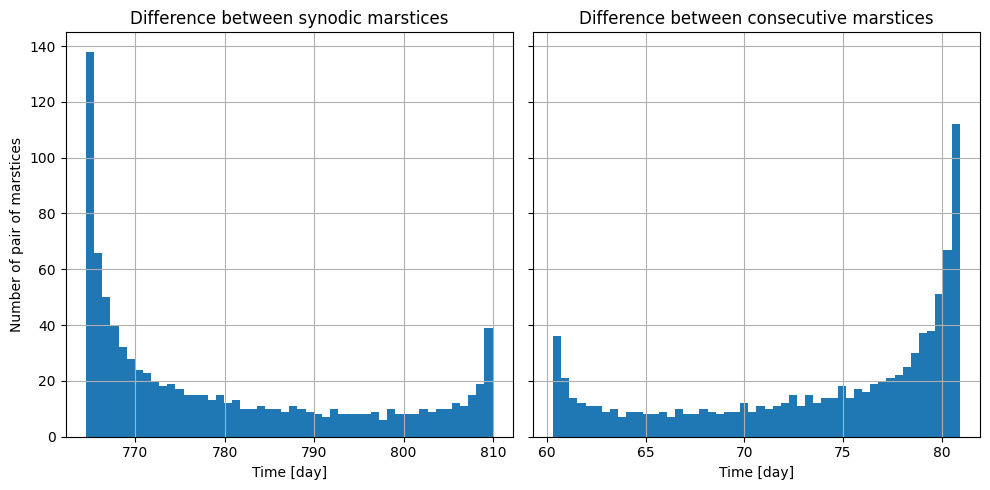

In [53]:
fig,axs = plt.subplots(1,2,figsize=(10,5),sharey=True)

ax = axs[0]
hs1 = ax.hist(delta1,bins=50)
ax.set_xlabel("Time [day]")
ax.set_ylabel("Number of pair of marstices")
ax.set_title("Difference between synodic marstices")
ax.grid()

ax = axs[1]
hs2 = ax.hist(delta2,bins=50)
ax.set_title("Difference between consecutive marstices")
ax.set_xlabel("Time [day]")
ax.grid()

fig.tight_layout()

In [54]:
print(f"Periodicity of synodic marstices: {hs1[1][0]:.1f} - {hs1[1][-1]:.1f}")
print(f"Periodicity of consecutive marstices: {hs2[1][0]:.1f} - {hs2[1][-1]:.1f}")


Periodicity of synodic marstices: 764.5 - 810.0
Periodicity of consecutive marstices: 60.3 - 80.9


### Periodicity of winter marstices

Let's extract the winter marstices:

In [55]:
winter_marstices = marstices[marstices.close_solstice]
len(winter_marstices)

188

Let's get the periodicity:

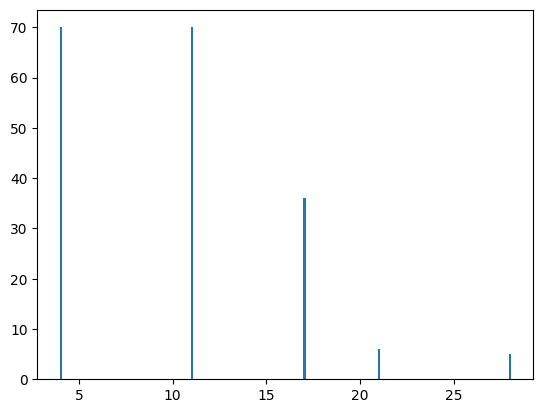

In [56]:
times = winter_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*DAY/YEAR
hs = plt.hist(delta,bins=200)


Get the periodicities:

In [57]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [11.01625759826025   4.035079618813615 17.034514477093555
 21.006564017123537 27.987741996570172]


### Periodicity of Aldebaran conjunctions

Let's extract the Aldebaran conjunctions:

In [58]:
aldebaran_marstices = marstices[marstices.close_aldebaran]
len(aldebaran_marstices)

154

Let's get the periodicity:

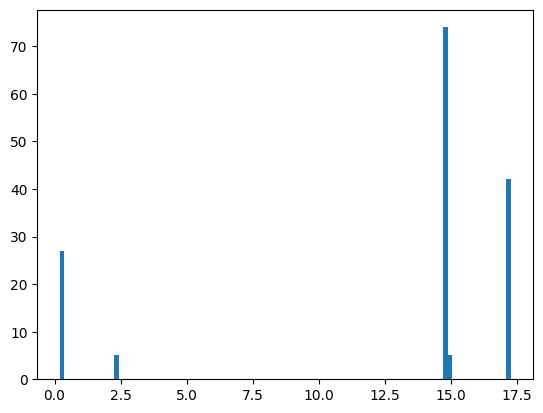

In [59]:
times = aldebaran_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*DAY/YEAR
hs = plt.hist(delta,bins=100)


Get the periodicities:

In [60]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [14.803518551736541   17.194172146207176    0.28883601387911384
 14.974279522770157    2.3379676662825153 ]


### Periodicity of Montunctions

Let's extract the Aldebaran conjunctions:

In [61]:
len(montunctions)

39

Let's get the periodicity:

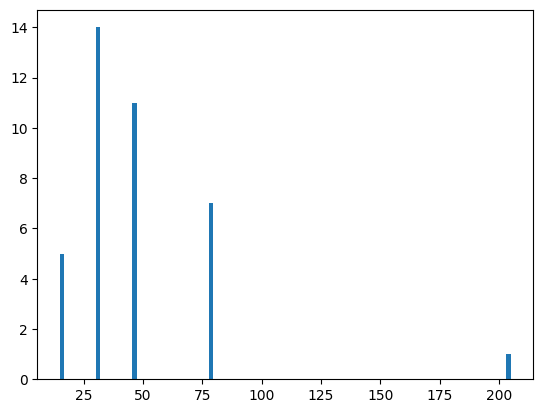

In [62]:
times = montunctions.jed.to_numpy()
delta = (times[1:]-times[:-1])*DAY/YEAR
hs = plt.hist(delta,bins=100)


Get the periodicities:

In [63]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of Montunctions [years]: ", Ps)

Periods of Montunctions [years]:  [ 31.10565775009552   46.309177781773414  78.61665784908894
  15.902137718417624 204.04569811043154 ]


## Lines chart of marstices and montunctions

In [64]:
# Selection of marstices
selection = marstices.loc[:]
nmarstices = len(selection)

jed_min = (1-1e-3)*selection.jed.min()
jed_max = (1+1e-3)*selection.jed.max()

# Number of panels
npanels = 6
delta_jed = (jed_max - jed_min)/npanels

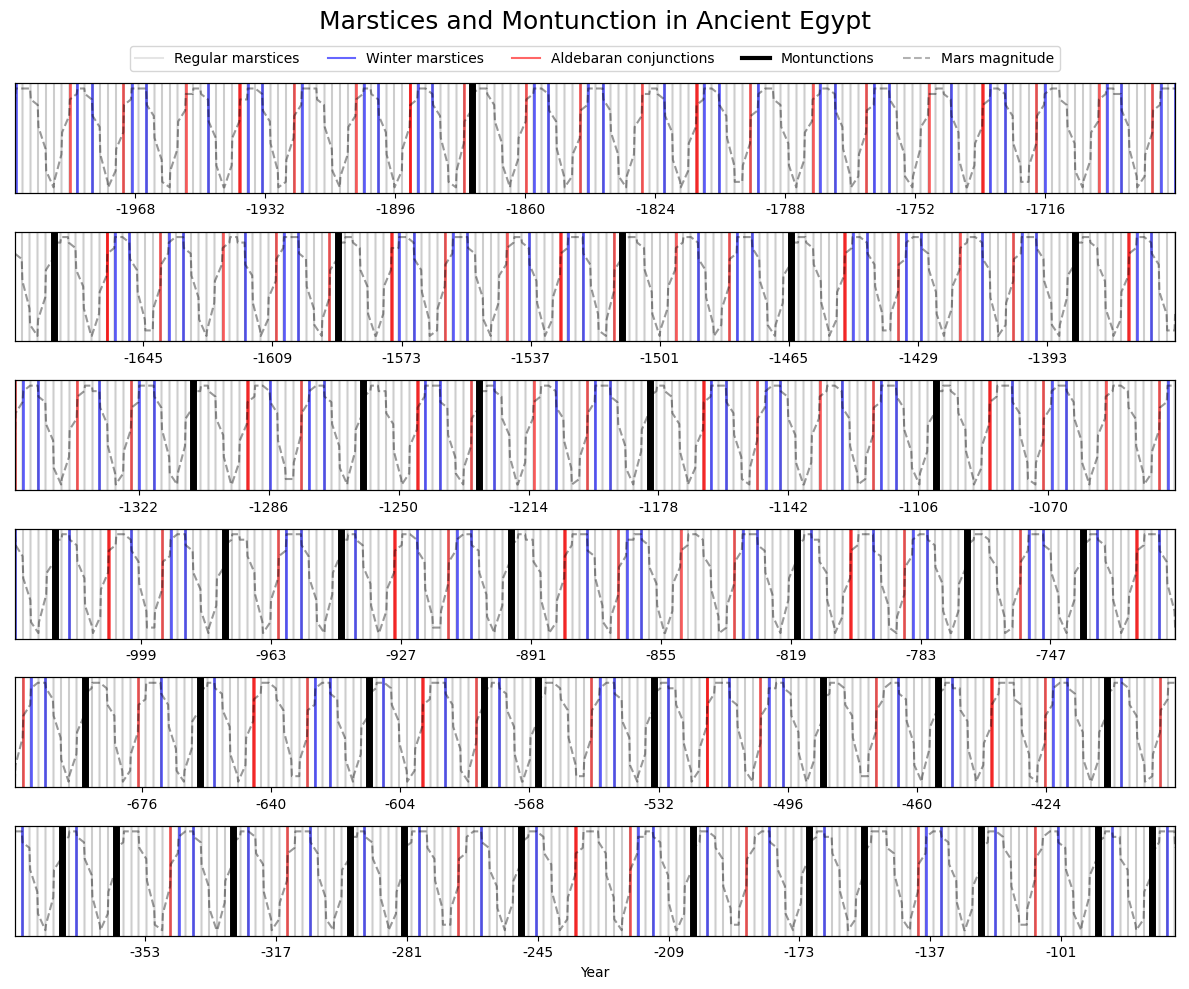

In [66]:
fig,axs = plt.subplots(npanels,1,figsize=(12,10))

axts = []
for ax in axs:
    axts += [ax.twinx()]

alpha_marst = 0.1
alpha_wmarst = 0.6
alpha_aldeb = 0.6
alpha_montu = 1
alpha_mag = 0.3

# Loop on marstices
for index in selection.index:

    # Get marstice information and location of mars
    marstice = selection.loc[index]
    mars_location = mars_marstices.loc[index]

    # Get MonTime object
    mtime = MonTime(marstice.jed,format='jd')

    # Get panel
    i = int(np.floor((mtime.jed - jed_min)/delta_jed))
    
    # Plot line for marstices
    axs[i].axvline(mtime.jed,color='k',alpha=alpha_marst)

    # Plot line for winter marstices
    if marstice.close_solstice:
        axs[i].axvline(mtime.jed,color='b',lw=2,alpha=alpha_wmarst)

    # Plot line for aldebaran conjunctions
    if marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='r',lw=2,alpha=alpha_aldeb)

    # Plot line for montunctions
    if marstice.close_solstice and marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='k',lw=5,alpha=alpha_montu)

# Plot distance
for i,axt in enumerate(axts):
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    cond = (marstices.jed>=jed_ax_min)&(marstices.jed<=jed_ax_max)
    #axt.plot(marstices[cond].jed,mars.df[cond].site_distance,'k',alpha=0.4)
    axt.plot(marstices[cond].jed,mars_marstices[cond].mag,'k--',alpha=0.4)
    
# Decoration
for i,ax in enumerate(axs):
    ax.margins(0)
    ax.get_yaxis().set_visible(False)
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    ax.set_xticks(np.linspace(jed_ax_min,jed_ax_max,10))
    
# Change xticks
for ax in axs:
    xticks = ax.get_xticks()
    xtick_labels = []
    for xt in xticks:
        mtime = MonTime(xt,format='jd')
        xtick_labels += [f'{mtime.year}']
    ax.set_xticklabels(xtick_labels)

for ax in axts:
    ax.margins(0)
    ax.set_yticks(np.arange(-2.5,0.0,0.5))
    ax.get_yaxis().set_visible(False)

# Legends 
axs[0].plot([],[],'k-',alpha=alpha_marst,label='Regular marstices')
axs[0].plot([],[],'b-',alpha=alpha_wmarst,label='Winter marstices')
axs[0].plot([],[],'r-',alpha=alpha_aldeb,label='Aldebaran conjunctions')
axs[0].plot([],[],'k-',alpha=alpha_montu,lw=3,label='Montunctions')
axs[0].plot([],[],'k--',alpha=alpha_mag,label='Mars magnitude')
axs[0].legend(bbox_to_anchor=(0.5,1.4),ncol=5,loc='upper center')

# Other decoration
axs[-1].set_xlabel('Year')

axs[0].text(0.5,1.5,"Marstices and Montunction in Ancient Egypt",
            transform=axs[0].transAxes,fontsize=18,ha='center')
fig.tight_layout()

Magnitude at Montunctions:

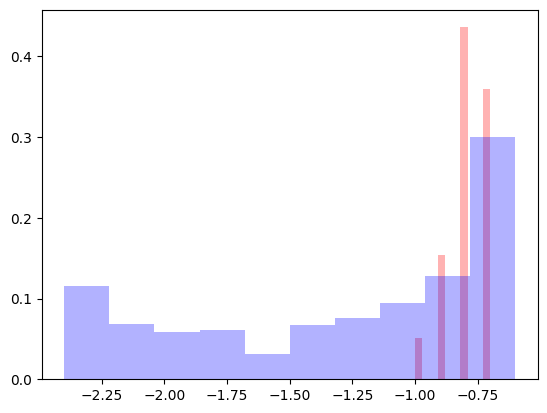

In [68]:
cond = cond_montunctions = (cond_solstices) & (cond_aldebaran)
hs = plt.hist(mars_marstices[cond].mag,color='r',alpha=0.3,
              weights=[1/len(mars_marstices[cond])]*len(mars_marstices[cond]))
hs = plt.hist(mars_marstices.mag,color='b',alpha=0.3,
              weights=[1/len(mars_marstices)]*len(mars_marstices))

## Algorithm to calculate station in longitude for mars

In [369]:
marstices = pd.DataFrame()
i = 0

# Range of years
initial_year = -2000
final_year = -70

mars.reset_store()
mtime = MonTime(f'{initial_year}-01-01 00:00:00.00',scale='utc',calendar='proleptic')
i=0
while True:
    epoch1 = Mars(mtime.obj_pyplanet).station_longitude_1()
    epoch2 = Mars(mtime.obj_pyplanet).station_longitude_2()
    print(mtime.obj_pyplanet.year(),epoch1,epoch2)
    mtime1 = MonTime(float(epoch1),format='jd',calendar='mixed')
    mtime2 = MonTime(float(epoch2),format='jd',calendar='mixed')

    mtime = mtime + 2*YEAR
    i+=1
    if i>10:break

-1999.9535519125684 990473.0365413779 990551.5847383336
-1997.9547929704718 991237.9500486348 991318.5404239997
-1995.9535488216961 992003.6864322815 992083.8105434901
-1993.9547898727549 992775.5512183867 992852.2389160669
-1991.9535457340617 993563.4193280826 993631.2026313848
-1989.954786778285 994372.682377654 994433.6022621093
-1987.9535426496661 995164.5984547004 995235.2379030539
-1985.9547836870624 995937.6887916481 996014.7479095068
-1983.9535395685084 996703.6491770019 996783.6262110925
-1981.9547805990867 997468.3761049401 997548.9350165927
-1979.953536490589 997468.3761049401 997548.9350165927


In [373]:
marstices = pd.DataFrame()
i = 0

# Range of years
initial_year = -2000
final_year = -70

mars.reset_store()
mtime = MonTime(f'{initial_year}-01-01 00:00:00.00',scale='utc',calendar='proleptic')
i=0
while True:
    epoch1 = Extra.station_longitude_1(mtime.year)
    epoch2 = Extra.station_longitude_2(mtime.year)
    print(mtime.obj_pyplanet.year(),epoch1,epoch2)
    mtime1 = MonTime(float(epoch1),format='jd',calendar='mixed')
    mtime2 = MonTime(float(epoch2),format='jd',calendar='mixed')

    mtime = mtime + 2*YEAR
    i+=1
    if i>10:break

-1999.9535519125684 990473.0365413779 990551.5847383336
-1997.9547929704718 991237.9500486348 991318.5404239997
-1995.9535488216961 992003.6864322815 992083.8105434901
-1993.9547898727549 992003.6864322815 992083.8105434901
-1991.9535457340617 993563.4193280826 993631.2026313848
-1989.954786778285 993563.4193280826 993631.2026313848
-1987.9535426496661 995164.5984547004 995235.2379030539
-1985.9547836870624 995164.5984547004 995235.2379030539
-1983.9535395685084 996703.6491770019 996783.6262110925
-1981.9547805990867 996703.6491770019 996783.6262110925
-1979.953536490589 997468.3761049401 997548.9350165927


In [300]:
mtime.jed

998610.0062072593

In [289]:
epoch1,epoch2,mtime1.datestr,mtime2.datestr

(Epoch(997468.3761049401),
 Epoch(997548.9350165927),
 '-1982-11-15 21:01:35.466800',
 '-1981-02-04 10:26:25.433600')

In [290]:
station_longitude_1(-1979.953536490589),station_longitude_2(-1979.953536490589)

(997468.3761049401, 997548.9350165927)

In [273]:
jde

-3000


625464.8061463411

## Montu Algorithm

We will develop an algorithm to find station in longitude.

First define a routine to show the advance in longitude for the planet:

In [322]:
def plot_station(planet,jde,dt=1,npoints=50):

    mtime_initial = MonTime(jde,format='jd')
    dlondts = []
    lons = []
    datetimes = []
    for t in np.linspace(-dt*365,dt*365,npoints):
        mtime = mtime_initial + t*DAY
        planet.calculate_sky_position(mtime,tebas,verbose=0,store=0)
        dlondts += [mars.ecliptic_longitude_advance(mtime,tebas,method='SPICE',dt=1*DAY)]
        lons += [planet.LonEpoch] 
        datetimes += [mtime.jed]

    fig,axs = plt.subplots(2,1,sharex=True)

    ax = axs[0]
    ax.plot(datetimes,dlondts)
    ax.axvline(jde,color='r')
    ax.grid()

    ax = axs[1]
    ax.plot(datetimes,lons)
    ax.axvline(jde,color='r')
    ax.grid()

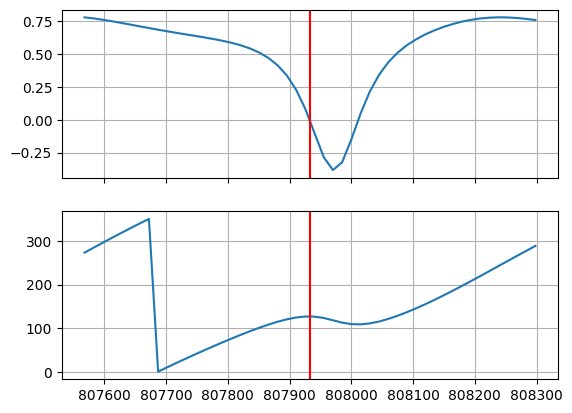

In [367]:
from montu import *

jde = station_longitude_1(-2500)
mars = PlanetaryBody('Mars')

plot_station(mars,jde)

(990209.4999999999, 990551.5847383336)

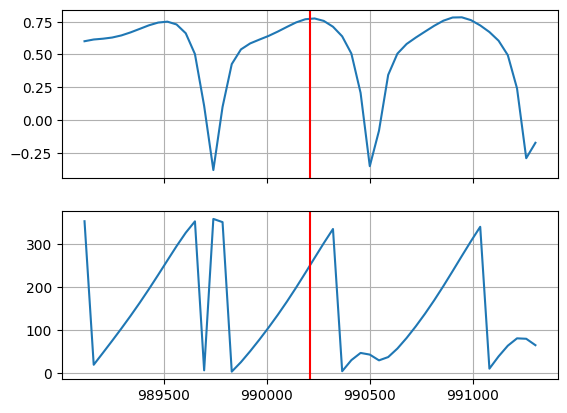

In [358]:
mtime = MonTime('-2001-01-01 00:00:00.00')
plot_station(mars,mtime.jed,dt=3)
mtime.jed, station_longitude_2(mtime.year)

In [361]:
def ecliptic_longitude(t):
    mars.calculate_sky_position(mtime+t*DAY,tebas,verbose=0,store=0)
    return mars.LonEpoch

In [364]:
min=minimize_scalar(ecliptic_longitude)
min.x

-387.8175923002247

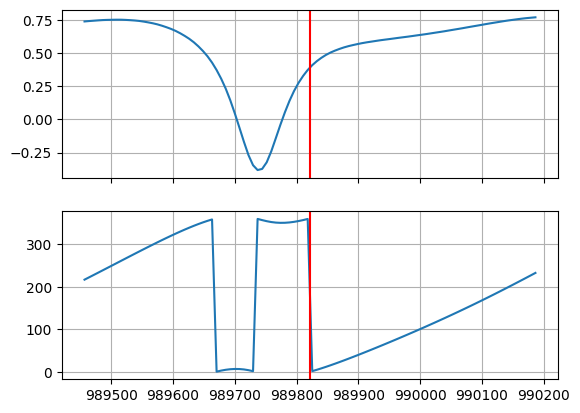

In [365]:
plot_station(mars,(mtime+min.x*DAY).jed,npoints=100)

In [359]:
retrograde = lambda t:mars.ecliptic_longitude_advance(mtime+t*DAY,tebas,method='SPICE',dt=1*HOUR)

In [360]:
newton(retrograde,0)

ValueError: year 53191 is out of range

In [356]:
bisect(retrograde,0,100)

ValueError: f(a) and f(b) must have different signs

In [347]:
from scipy.optimize import newton,minimize_scalar,bisect

In [348]:
min = minimize_scalar(retrograde,bounds=(0,2000),method='Bounded')
min

     fun: -0.41806554236882226
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 700.363640665241

In [349]:
min = minimize_scalar(retrograde,bounds=(-50,0),method='Bounded')
min

     fun: -0.31952267484200547
 message: 'Solution found.'
    nfev: 16
  status: 0
 success: True
       x: -46.720785832768534

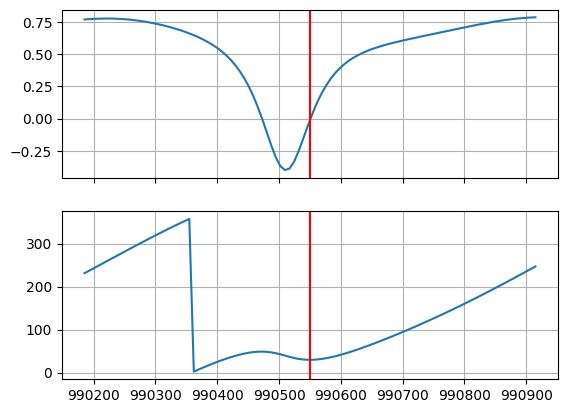

In [355]:
plot_station(mars,(mtime-24.393896157742745*DAY).jed,npoints=100)